Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

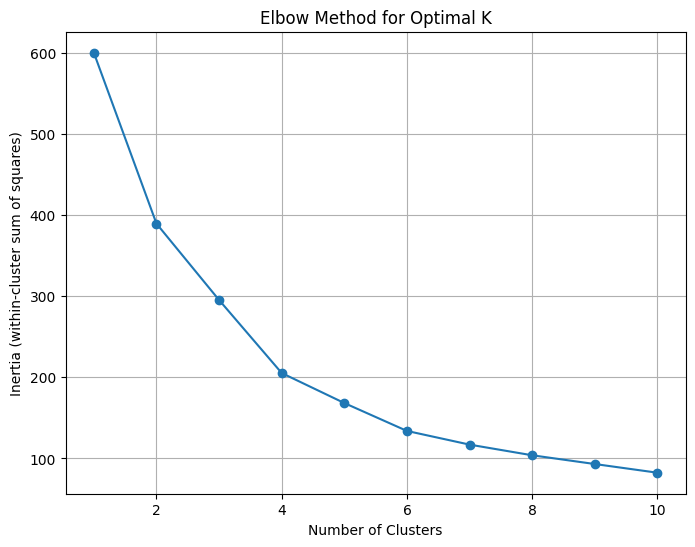

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


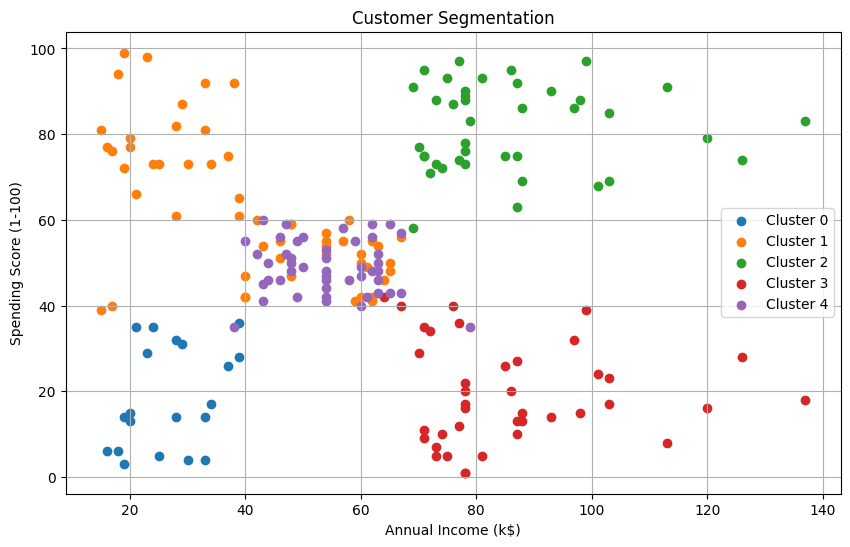

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Mall Customers Dataset
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# Select relevant features (e.g., 'Age', 'Annual Income (k$)', 'Spending Score (1-100)')
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Based on the elbow curve, choose an appropriate K (e.g., 5)
kmeans_final = KMeans(n_clusters=5, random_state=42)
kmeans_final.fit(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = kmeans_final.labels_

# Visualize the clusters (scatter plot)
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.grid(True)
plt.show()


1. What type of machine learning problem is this?
clustering problem. We aim to group similar customers together based on certain features.
2. What machine learning algorithms are suitable for customer segmentation tasks?
-K-means Clustering: Divides customers into
clusters based on similar features.
-Hierarchical Clustering: Organizes customers into a tree-like hierarchy of clusters.
-DBSCAN: Identifies clusters based on density of points in data space.
-Principal Component Analysis (PCA): Reduces dimensionality while preserving important information.
-Decision Trees: Can be used for hierarchical segmentation based on feature thresholds.
-Neural Networks: Learn complex patterns in data through interconnected layers of nodes.
